In [1]:
###LAB | Cleaning numerical data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
#2.Load the file into a variable
data = pd.read_csv("./files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")

In [4]:
pd.set_option('display.max_columns', 500)
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [5]:
#3.First look at its main features (head, shape, info).
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
data.shape

(9134, 24)

In [7]:
data.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  \
0     Bachelor         

In [8]:
#4.Rename the columns so they follow the PE8 (snake case).
cols = []

for i in range(len(data.columns)):
    cols.append(data.columns[i].lower().replace(" ","_"))
    
data.columns = cols


In [9]:
#setting customer as index so the data does not get swiched in later processes

data.set_index("customer")

the_index = data["customer"]

the_index

0       BU79786
1       QZ44356
2       AI49188
3       WW63253
4       HB64268
         ...   
9129    LA72316
9130    PK87824
9131    TD14365
9132    UP19263
9133    Y167826
Name: customer, Length: 9134, dtype: object

In [10]:
#5.Change effective to date column to datetime format. 
data["effective_to_date"] = pd.to_datetime(data.effective_to_date)

In [11]:
#6/8.Check NaN values per column.
data.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [12]:
#7/2/9.Define a function that differentiates between continuous and discrete variables.
#5000 is the number chosen it being close to 60% of the rows of the dataframe

def continuous_discrete(x):
    discrete = []
    continuous = []
    categorical = x.select_dtypes(include = np.object)
    numerical = x.select_dtypes(include = np.number)
    for col in numerical.columns:
        if numerical[col].nunique() > 5000:
            continuous.append(col)
        else:
            discrete.append(col)
    return x[discrete],x[continuous],categorical

In [13]:
discrete,continuous,categorical = continuous_discrete(data)

<ipython-input-12-1ca5f46bad9b>:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = x.select_dtypes(include = np.object)


In [14]:
discrete = discrete.join(the_index).set_index("customer")
discrete

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
customer,,,,,
BU79786,69,32,5,0,1
QZ44356,94,13,42,0,8
AI49188,108,18,38,0,2
WW63253,106,18,65,0,7
HB64268,73,12,44,0,1
...,...,...,...,...,...
LA72316,73,18,89,0,2
PK87824,79,14,28,0,1
TD14365,85,9,37,3,2


In [15]:
continuous = continuous.join(the_index).set_index("customer")
continuous

,customer_lifetime_value,income,total_claim_amount
customer,,,
BU79786,2763.519279,56274,384.811147
QZ44356,6979.535903,0,1131.464935
AI49188,12887.431650,48767,566.472247
WW63253,7645.861827,0,529.881344
HB64268,2813.692575,43836,138.130879
...,...,...,...
LA72316,23405.987980,71941,198.234764
PK87824,3096.511217,21604,379.200000
TD14365,8163.890428,0,790.784983


In [16]:
categorical = categorical.set_index("customer")
categorical

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize


In [17]:
categorical["state"].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [18]:
# 8/10.For the categorical data, check if there is some kind of text in a variable so we would need to clean it.

def checkcategorical(x):
    truecategorical = []
    idcategorical = []
    for col in x.columns:
        print (col , x[col].unique())
        if x[col].nunique() > 50:
            idcategorical.append(col)
        else:
            truecategorical.append(col)
    return x[idcategorical],x[truecategorical]
        
idcategorical,truecategorical = checkcategorical(categorical)

state ['Washington' 'Arizona' 'Nevada' 'California' 'Oregon']
response ['No' 'Yes']
coverage ['Basic' 'Extended' 'Premium']
education ['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor']
employmentstatus ['Employed' 'Unemployed' 'Medical Leave' 'Disabled' 'Retired']
gender ['F' 'M']
location_code ['Suburban' 'Rural' 'Urban']
marital_status ['Married' 'Single' 'Divorced']
policy_type ['Corporate Auto' 'Personal Auto' 'Special Auto']
policy ['Corporate L3' 'Personal L3' 'Corporate L2' 'Personal L1' 'Special L2'
 'Corporate L1' 'Personal L2' 'Special L1' 'Special L3']
renew_offer_type ['Offer1' 'Offer3' 'Offer2' 'Offer4']
sales_channel ['Agent' 'Call Center' 'Web' 'Branch']
vehicle_class ['Two-Door Car' 'Four-Door Car' 'SUV' 'Luxury SUV' 'Sports Car'
 'Luxury Car']
vehicle_size ['Medsize' 'Small' 'Large']


In [19]:
#9/11.Get categorical features.

#truecategorical = truecategorical.join(the_index).set_index("customer")
truecategorical

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize


In [20]:
#10/12.What should we do with the customer_id column?

#Since all the customer values are different they can be used as an id.

idcategorical.nunique()

Series([], dtype: float64)

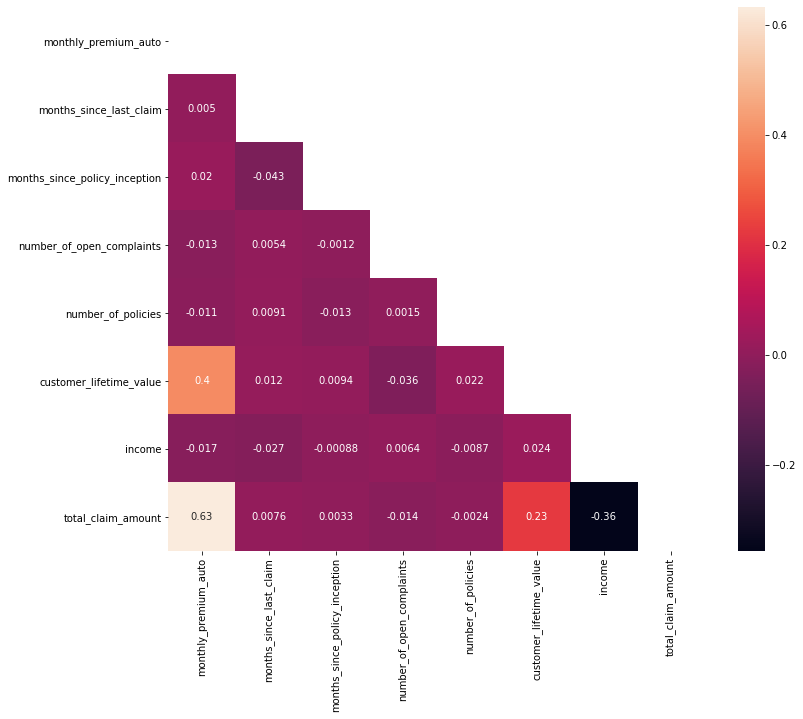

' i can see overall low correlations between the values except with total_claim_ammount and monthly_\npremium_auto which and a decent negative correlation with income'

In [21]:
#3.Plot a correlation matrix, what can you see? (with the numerical values)
all_numericals = pd.concat([discrete,continuous], axis=1)

mask = np.zeros_like(all_numericals.corr())

mask[np.triu_indices_from(mask)] = True #hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(all_numericals.corr(), mask=mask, annot=True)
plt.show()

""" i can see overall low correlations between the values except with total_claim_ammount and monthly_
premium_auto which and a decent negative correlation with income"""

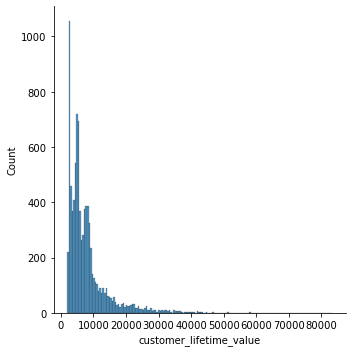

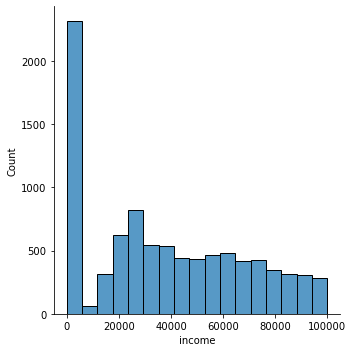

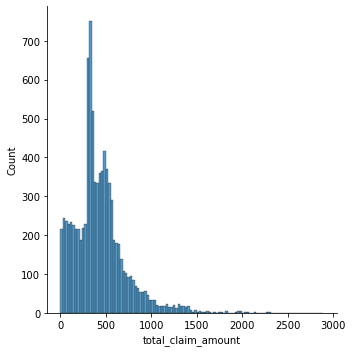

In [22]:
#4.Create a function to plot every discrete variables. Do the same with continuous variables.

#continuous variables:def plot_continuous(x):

def plot_continuous(x):
    for column in x.select_dtypes(np.number).columns:
        (sns.displot(x[column]))
        plt.show()
plot_continuous(continuous)

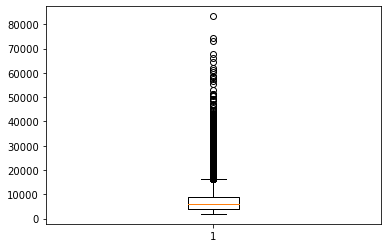

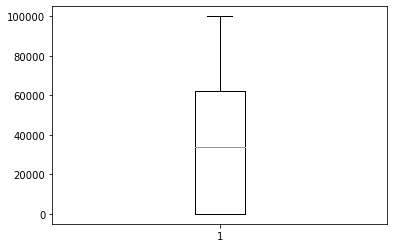

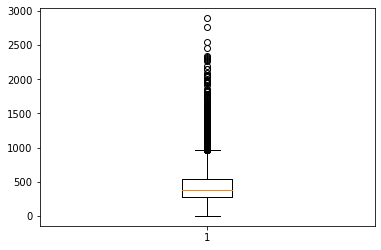

In [23]:
#6.Look for outliers in the continuous variables we have found.

def continuous_outliers(continuous):
    for column in continuous:
        (plt.boxplot(column , data=continuous))
        plt.show()
        
continuous_outliers(continuous)


In [24]:
#7.Have you found outliers? If you have, what should we do with them? (yes) 

def filter_boys(continuous):
    for column in continuous:
        Q1 = continuous[column].quantile(0.25)
        Q3 = continuous[column].quantile(0.75)
        IQR = Q3 - Q1 

        filter = (continuous[column] >= Q1 - 1.5 * IQR) & (continuous[column] <= Q3 + 1.5 *IQR)
        return continuous.loc[filter]

continuous = filter_boys(continuous)

In [25]:
#12. What should we do with the customer id column?

#turn it into an id
data.set_index('customer')

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize


###Lab | Feature extraction

In [26]:
#1.Open the categoricals variable we created before.

truecategorical

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize


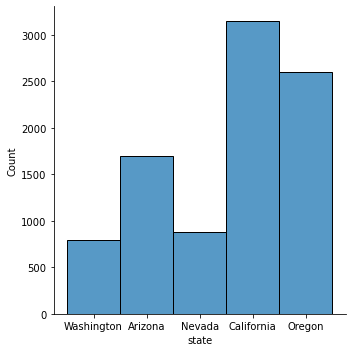

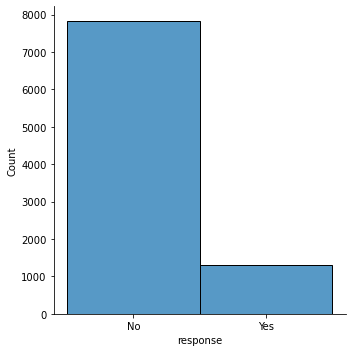

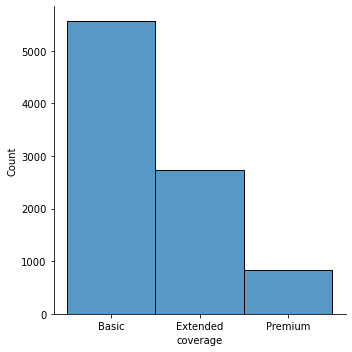

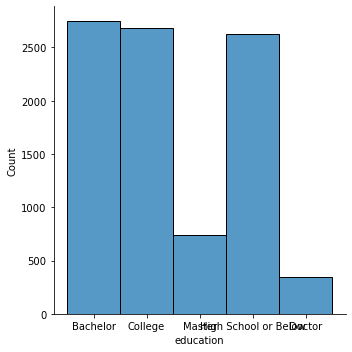

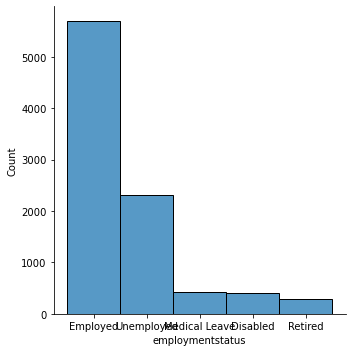

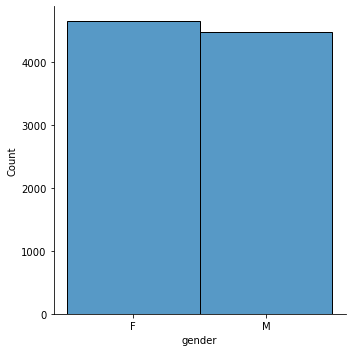

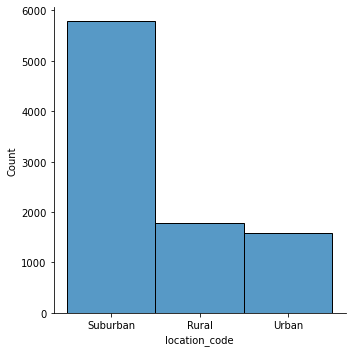

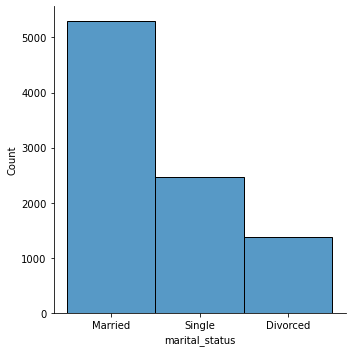

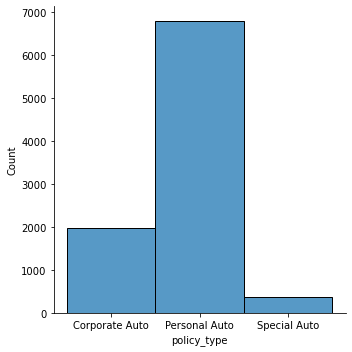

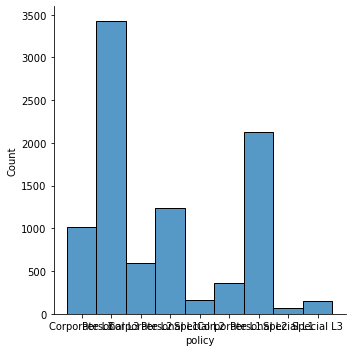

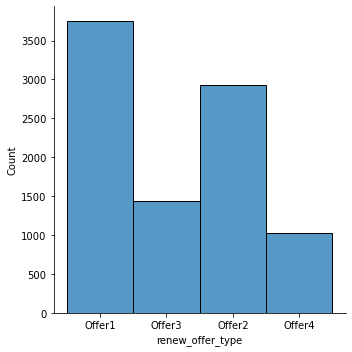

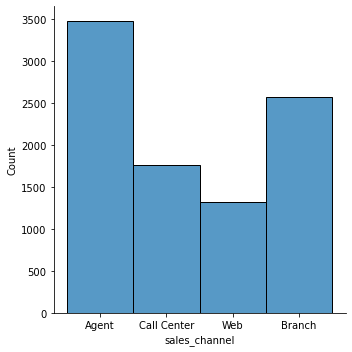

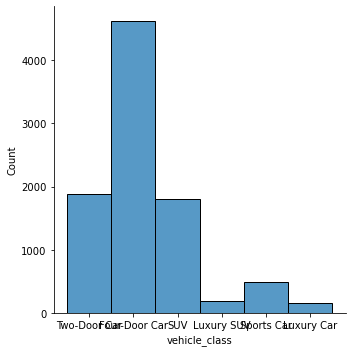

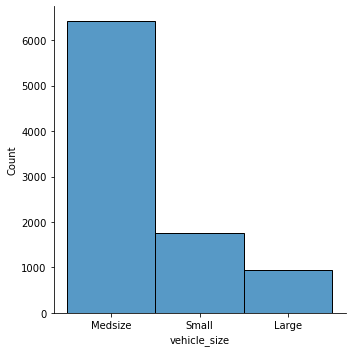

In [27]:
#2.Plot all the categorical variables with the proper plot. What can you see?

def plot_categorical(x):
    for column in x.columns:
        (sns.displot(x[column]))

plot_categorical(truecategorical)

In [28]:
#3.There might be some columns that seem to be redundant, check their values to be sure. 
# What should we do with them?

"""In this particular case there were no redundant values in columns, all of them provide a specific piece
of information that seem to be valuable when applied with a prediction model. Maybe some features could be
highly correlated between themselves and that would make them redundant but at this point in the project
I don't know so i will leave them in so i am not losing data that could be important before testing."""

"In this particular case there were no redundant values in columns, all of them provide a specific piece\nof information that seem to be valuable when applied with a prediction model. Maybe some features could be\nhighly correlated between themselves and that would make them redundant but at this point in the project\nI don't know so i will leave them in so i am not losing data that could be important before testing."

'The way the plot currently is nothing can be extracted from it since there is too much data.\nOne way to maybe extract something from it would be to plot it with other column so that the plot can\nmaybe give some usefull information.'

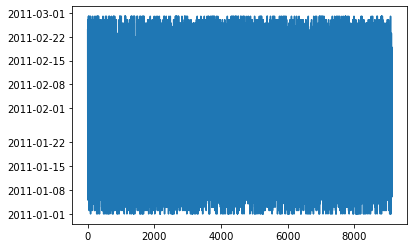

In [29]:
#4.Plot time variable. Can you extract something from it?

data["effective_to_date"].plot()

"""The way the plot currently is nothing can be extracted from it since there is too much data.
One way to maybe extract something from it would be to plot it with other column so that the plot can
maybe give some usefull information."""

###Lab | Data cleaning and wrangling

In [30]:
#1.We will start with removing outliers. So far, we have discussed different methods to remove outliers.
#Use the one you feel more comfortable with, define a function for that.
#Use the function to remove the outliers and apply it to the dataframe.

"""Already done in the previous lab (cell 27/part: #7)"""

'Already done in the previous lab (cell 27/part: #7)'

In [31]:
#2.Create a copy of the dataframe for the data wrangling.

data01 = data.copy()

In [32]:
# Separating the target from the features since descaling it all was not working before

In [33]:
#3.Normalize the continuous variables. You can use any one method you want.
#using minmaxscaller
continuous2 = continuous.copy()

#setting index from the continuous data and storing in a variable for latter aplication
index_c = continuous2.index

scaler = MinMaxScaler()

continuous2 = scaler.fit_transform(continuous2)

#transforming the array into a dataframe and setting previous created index
continuous2 = pd.DataFrame(continuous2).set_index(index_c)
continuous2

,0,1,2
customer,,,
BU79786,0.059651,0.562847,0.132974
QZ44356,0.350217,0.000000,0.391051
AI49188,0.757387,0.487763,0.195764
WW63253,0.396140,0.000000,0.183117
HB64268,0.063109,0.438443,0.047710
...,...,...,...
YM19146,0.151788,0.477701,0.187057
PK87824,0.082600,0.216081,0.131034
TD14365,0.431842,0.000000,0.273297


In [34]:
#4.Encode the categorical variables

truecategorical = pd.get_dummies(truecategorical, drop_first=True)
truecategorical

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
QZ44356,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
AI49188,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
WW63253,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
HB64268,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
PK87824,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
TD14365,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [35]:
#5.The time variable can be useful.
#Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
import datetime

data['year_'] = data['effective_to_date'].dt.year
data['month_'] = data['effective_to_date'].dt.month
data['day_'] = data['effective_to_date'].dt.day

data.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year_,month_,day_
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011,2,24
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011,1,31
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011,2,19
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011,1,20
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011,2,3


In [36]:
date_values = data[["year_","month_","day_"]].copy().join(the_index).set_index("customer")

date_values

,year_,month_,day_
customer,,,
BU79786,2011,2,24
QZ44356,2011,1,31
AI49188,2011,2,19
WW63253,2011,1,20
HB64268,2011,2,3
...,...,...,...
LA72316,2011,2,10
PK87824,2011,2,12
TD14365,2011,2,6


In [37]:
#6.Since the model will only accept numerical data, check and make sure that every column is numerical,
#if some are not, change it using encoding.

"""merging the data point in a new dataframe"""
#merged_data = pd.concat([truecategorical, continuous,date_values,discrete], axis=1)

merged_data = truecategorical.join(continuous).join(date_values).join(discrete)

merged_data

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_M,location_code_Suburban,location_code_Urban,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small,customer_lifetime_value,income,total_claim_amount,year_,month_,day_,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2763.519279,56274.0,384.811147,2011,2,24,69,32,5,0,1
QZ44356,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,6979.535903,0.0,1131.464935,2011,1,31,94,13,42,0,8
AI49188,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,12887.431650,48767.0,566.472247,2011,2,19,108,18,38,0,2
WW63253,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,7645.861827,0.0,529.881344,2011,1,20,106,18,65,0,7
HB64268,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2813.692575,43836.0,138.130879,2011,2,3,73,12,44,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,NaN,NaN,NaN,2011,2,10,73,18,89,0,2
PK87824,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,3096.511217,21604.0,379.200000,2011,2,12,79,14,28,0,1
TD14365,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,8163.890428,0.0,790.784983,2011,2,6,85,9,37,3,2


In [38]:
merged_data.isna().sum()

state_California                    0
state_Nevada                        0
state_Oregon                        0
state_Washington                    0
response_Yes                        0
coverage_Extended                   0
coverage_Premium                    0
education_College                   0
education_Doctor                    0
education_High School or Below      0
education_Master                    0
employmentstatus_Employed           0
employmentstatus_Medical Leave      0
employmentstatus_Retired            0
employmentstatus_Unemployed         0
gender_M                            0
location_code_Suburban              0
location_code_Urban                 0
marital_status_Married              0
marital_status_Single               0
policy_type_Personal Auto           0
policy_type_Special Auto            0
policy_Corporate L2                 0
policy_Corporate L3                 0
policy_Personal L1                  0
policy_Personal L2                  0
policy_Perso

In [39]:
merged_data = merged_data.dropna(axis=0)

In [40]:
merged_data.isna().sum()

state_California                  0
state_Nevada                      0
state_Oregon                      0
state_Washington                  0
response_Yes                      0
coverage_Extended                 0
coverage_Premium                  0
education_College                 0
education_Doctor                  0
education_High School or Below    0
education_Master                  0
employmentstatus_Employed         0
employmentstatus_Medical Leave    0
employmentstatus_Retired          0
employmentstatus_Unemployed       0
gender_M                          0
location_code_Suburban            0
location_code_Urban               0
marital_status_Married            0
marital_status_Single             0
policy_type_Personal Auto         0
policy_type_Special Auto          0
policy_Corporate L2               0
policy_Corporate L3               0
policy_Personal L1                0
policy_Personal L2                0
policy_Personal L3                0
policy_Special L1           

In [41]:
#checking if all data is numerical (is it)
merged_data.dtypes

state_California                    uint8
state_Nevada                        uint8
state_Oregon                        uint8
state_Washington                    uint8
response_Yes                        uint8
coverage_Extended                   uint8
coverage_Premium                    uint8
education_College                   uint8
education_Doctor                    uint8
education_High School or Below      uint8
education_Master                    uint8
employmentstatus_Employed           uint8
employmentstatus_Medical Leave      uint8
employmentstatus_Retired            uint8
employmentstatus_Unemployed         uint8
gender_M                            uint8
location_code_Suburban              uint8
location_code_Urban                 uint8
marital_status_Married              uint8
marital_status_Single               uint8
policy_type_Personal Auto           uint8
policy_type_Special Auto            uint8
policy_Corporate L2                 uint8
policy_Corporate L3               

In [42]:
merged_data1 = merged_data.copy()

lascols = ['customer_lifetime_value', 'income',"total_claim_amount"]

merged_data1[lascols] = merged_data1[lascols].applymap(np.int64)

merged_data1.dtypes

state_California                  uint8
state_Nevada                      uint8
state_Oregon                      uint8
state_Washington                  uint8
response_Yes                      uint8
coverage_Extended                 uint8
coverage_Premium                  uint8
education_College                 uint8
education_Doctor                  uint8
education_High School or Below    uint8
education_Master                  uint8
employmentstatus_Employed         uint8
employmentstatus_Medical Leave    uint8
employmentstatus_Retired          uint8
employmentstatus_Unemployed       uint8
gender_M                          uint8
location_code_Suburban            uint8
location_code_Urban               uint8
marital_status_Married            uint8
marital_status_Single             uint8
policy_type_Personal Auto         uint8
policy_type_Special Auto          uint8
policy_Corporate L2               uint8
policy_Corporate L3               uint8
policy_Personal L1                uint8


###Lab | Comparing regression models

In [43]:
#1.In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

#train test split already imported in the cell 1

# splitting the data

X = merged_data.drop('monthly_premium_auto', axis=1)
y = merged_data['monthly_premium_auto']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
#applying simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [45]:
predictions = model.predict(X_test)

In [46]:
#not used but will keep here
# predictions = scaler.inverse_transform([model.predict(X_test)])

In [47]:
#test R2,MAE,MSE results from simple linear regression model
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.9620531830080256, 4.7736447245524705, 6.2590270761858084)

In [48]:
import math

results = pd.DataFrame()
results['true'] = y_test
predictions = model.predict(X_test)
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,resid
customer,,,
XV76553,112,109.015427,2.984573
NY56352,74,66.976583,7.023417
FM37864,89,86.330247,2.669753
MR27647,85,85.329433,0.329433
IC11062,139,129.829679,9.170321
...,...,...,...
JM62924,84,87.814234,3.814234
TY26512,88,87.643738,0.356262
DQ45854,68,68.442094,0.442094


C:\Users\fmfdu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='true', ylabel='pred'>

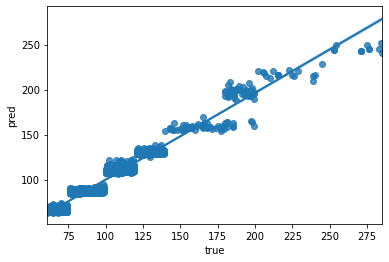

In [49]:
sns.regplot(results['true'], results['pred'])

In [53]:
#4.Use the function to check LinearRegressor and KNeighborsRegressor. KNeighborsRegressor Part
from sklearn.neighbors import KNeighborsRegressor

def kneib(X,y):
    neigh = KNeighborsRegressor(n_neighbors=2)
    neigh.fit(X, y)
    return neigh

model = kneib(X_train,y_train)
predictions = model.predict(X_test)


In [54]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.4579981957686424, 12.268229166666666, 23.654813046998733)

In [55]:
results = pd.DataFrame()
results['true'] = y_test
predictions = model.predict(X_test)
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,resid
customer,,,
XV76553,112,83.5,28.5
NY56352,74,73.0,1.0
FM37864,89,85.5,3.5
MR27647,85,75.0,10.0
IC11062,139,139.0,0.0
...,...,...,...
JM62924,84,109.5,25.5
TY26512,88,88.0,0.0
DQ45854,68,166.0,98.0


C:\Users\fmfdu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='true', ylabel='pred'>

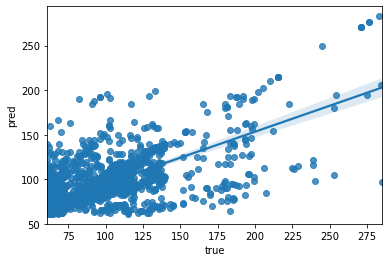

In [56]:
sns.regplot(results['true'], results['pred'])